In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.systems import h4_distortion_grid
from src.runners_h4 import run_sweep_h4


In [3]:
deltas = np.linspace(-0.30, 0.30, 9)   # 9 points
specs = h4_distortion_grid(deltas, a=1.0)
specs[0], specs[-1]


(MoleculeSpec(name='H4_sq_d-0.30_a1.00', geometry=[('H', (-0.35, -0.65, 0.0)), ('H', (0.35, -0.65, 0.0)), ('H', (0.35, 0.65, 0.0)), ('H', (-0.35, 0.65, 0.0))], charge=0, spin=0, basis='sto-3g', unit='Angstrom'),
 MoleculeSpec(name='H4_sq_d+0.30_a1.00', geometry=[('H', (-0.65, -0.35, 0.0)), ('H', (0.65, -0.35, 0.0)), ('H', (0.65, 0.35, 0.0)), ('H', (-0.65, 0.35, 0.0))], charge=0, spin=0, basis='sto-3g', unit='Angstrom'))

In [5]:
df4 = run_sweep_h4(specs, hea_layers=(1,2,3), ncas=4, nelecas=(2,2))
df4.to_csv("../results/h4_scan.csv", index=False)
df4.head()



converged SCF energy = -2.10802204455556
CASSCF energy = -2.15143462579355
CASCI E = -2.15143462579355  E(CI) = -5.19429636317100  S^2 = 0.0000000
converged SCF energy = -2.05805080133901
CASSCF energy = -2.11116562921698
CASCI E = -2.11116562921698  E(CI) = -5.07086370316872  S^2 = 0.0000000
converged SCF energy = -1.98156040785554
CASSCF energy = -2.04774747086705
CASCI E = -2.04774747086705  E(CI) = -4.95326840452459  S^2 = 0.0000000
converged SCF energy = -1.88225871653638
CASSCF energy = -1.96977088242668
CASCI E = -1.96977088242668  E(CI) = -4.84472720347823  S^2 = 0.0000000
converged SCF energy = -1.7610750541361
CASSCF energy = -1.91510654951180
CASCI E = -1.91510654951180  E(CI) = -4.78018498177364  S^2 = 0.0000000
converged SCF energy = -1.88225871653637
CASSCF energy = -1.96977088242668
CASCI E = -1.96977088242668  E(CI) = -4.84472720347823  S^2 = 0.0000000
converged SCF energy = -1.98156040785554
CASSCF energy = -2.04774747086705
CASCI E = -2.04774747086705  E(CI) = -4.9532

,system,name,param,mr_score,ansatz,layers,n_qubits,n_params,depth,n_2q,E_HF,E_FCI,noon_0,noon_1,noon_2,noon_3
0,H4,H4_sq_d-0.30_a1.00,-0.30,1.210551,HEA,1,8,8,8,7,-2.108022,-2.151435,1.821257,0.863543,0.088105,0.08016
1,H4,H4_sq_d-0.30_a1.00,-0.30,1.210551,HEA,2,8,16,11,14,-2.108022,-2.151435,1.821257,0.863543,0.088105,0.08016
2,H4,H4_sq_d-0.30_a1.00,-0.30,1.210551,HEA,3,8,24,14,21,-2.108022,-2.151435,1.821257,0.863543,0.088105,0.08016
3,H4,H4_sq_d-0.30_a1.00,-0.30,1.210551,UCCSD,0,8,0,0,0,-2.108022,-2.151435,1.821257,0.863543,0.088105,0.08016
4,H4,H4_sq_d-0.22_a1.00,-0.22,1.087697,HEA,1,8,8,8,7,-2.058051,-2.111166,1.980722,0.861722,0.104907,0.10179


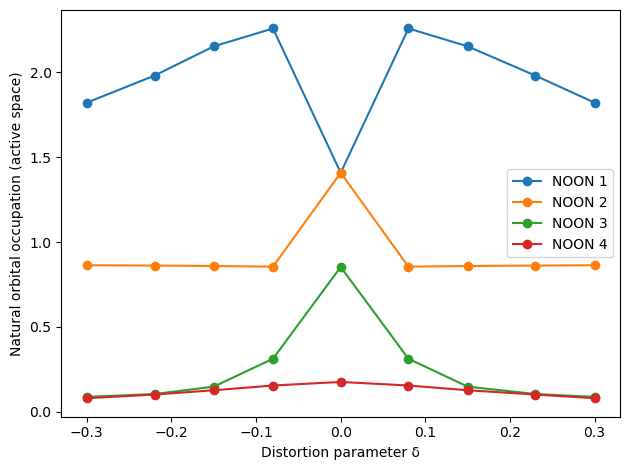

In [6]:
df4_u = df4[df4["ansatz"]=="UCCSD"].sort_values("param")

plt.figure()
plt.plot(df4_u["param"], df4_u["noon_0"], marker="o", label="NOON 1")
plt.plot(df4_u["param"], df4_u["noon_1"], marker="o", label="NOON 2")
plt.plot(df4_u["param"], df4_u["noon_2"], marker="o", label="NOON 3")
plt.plot(df4_u["param"], df4_u["noon_3"], marker="o", label="NOON 4")
plt.xlabel("Distortion parameter δ")
plt.ylabel("Natural orbital occupation (active space)")
plt.legend()
plt.tight_layout()
os.makedirs("../results/figures", exist_ok=True)
plt.savefig("../results/figures/h4_noons_vs_delta.png", dpi=200, bbox_inches="tight")
plt.show()


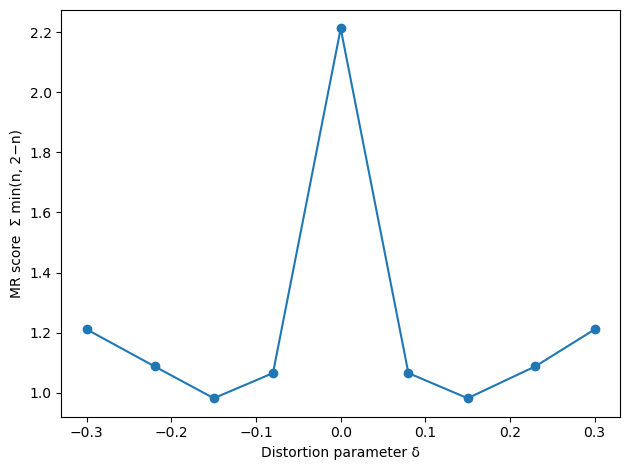

In [7]:
plt.figure()
plt.plot(df4_u["param"], df4_u["mr_score"], marker="o")
plt.xlabel("Distortion parameter δ")
plt.ylabel("MR score  Σ min(n, 2−n)")
plt.tight_layout()
plt.savefig("../results/figures/h4_mrscore_vs_delta.png", dpi=200, bbox_inches="tight")
plt.show()


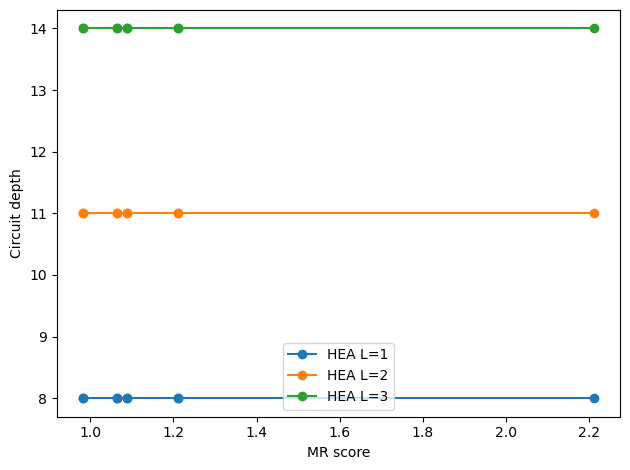

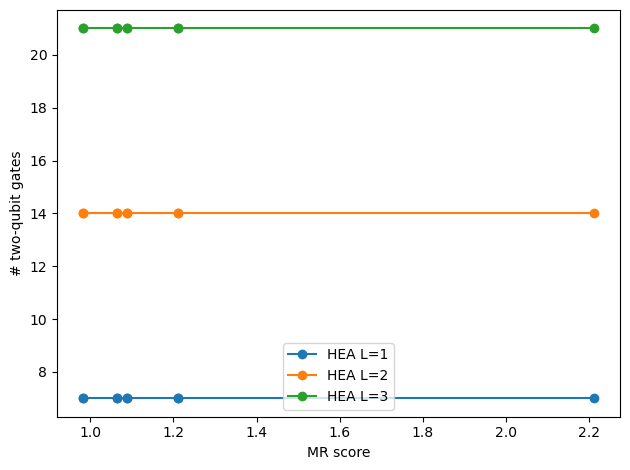

In [8]:
plt.figure()
for L in sorted(df4[df4["ansatz"]=="HEA"]["layers"].unique()):
    d = df4[(df4["ansatz"]=="HEA") & (df4["layers"]==L)].sort_values("mr_score")
    plt.plot(d["mr_score"], d["depth"], marker="o", label=f"HEA L={L}")
plt.xlabel("MR score")
plt.ylabel("Circuit depth")
plt.legend()
plt.tight_layout()
plt.savefig("../results/figures/h4_depth_vs_mrscore.png", dpi=200, bbox_inches="tight")
plt.show()

plt.figure()
for L in sorted(df4[df4["ansatz"]=="HEA"]["layers"].unique()):
    d = df4[(df4["ansatz"]=="HEA") & (df4["layers"]==L)].sort_values("mr_score")
    plt.plot(d["mr_score"], d["n_2q"], marker="o", label=f"HEA L={L}")
plt.xlabel("MR score")
plt.ylabel("# two-qubit gates")
plt.legend()
plt.tight_layout()
plt.savefig("../results/figures/h4_2q_vs_mrscore.png", dpi=200, bbox_inches="tight")
plt.show()


In [15]:
import numpy as np
import pandas as pd

from src.hamiltonians import molecular_qubit_hamiltonian
from src.ansatze import hea_with_hf_init
from src.vqe_utils import qubitop_to_sparsepauliop, run_vqe

# Use the same specs you used to generate df4:
# specs = h4_distortion_grid(deltas, a=1.0)

# Cache Hamiltonians so you don't rebuild them repeatedly
ham_cache = {}

records = []

for spec in specs:
    if spec.name not in ham_cache:
        qham, n_qubits = molecular_qubit_hamiltonian(spec)
        op = qubitop_to_sparsepauliop(qham, n_qubits)
        ham_cache[spec.name] = (op, n_qubits)
    else:
        op, n_qubits = ham_cache[spec.name]

    # Pull reference MR + FCI from your df4_u slice (unique per geometry)
    row_ref = df4[(df4["ansatz"]=="UCCSD") & (df4["name"]==spec.name)].iloc[0]
    mr = float(row_ref["mr_score"])
    e_fci = float(row_ref["E_FCI"])
    delta = float(row_ref["param"])
    e_hf = float(row_ref["E_HF"])


    for L in (1,2,3):
        #qc = hea(n_qubits, layers=L, entangle="linear")
        n_electrons = 4  # H4 neutral
        qc = hea_with_hf_init(n_qubits, n_electrons, layers=L, entangle="linear")


        vqe = run_vqe(op, qc, maxiter=250, seed=11 + L)
        records.append({
            "name": spec.name,
            "delta": delta,
            "mr_score": mr,
            "layers": L,
            "E_VQE": vqe.energy,
            "E_FCI": e_fci,
            "E_HF": e_hf,
            "dE": vqe.energy - e_fci,
            "dE_FCI": vqe.energy - e_fci,
            "dE_HF": vqe.energy - e_hf,
            "success": vqe.success,
            "nfev": vqe.nfev,
            "message": vqe.message,
        })

df_vqe = pd.DataFrame(records).sort_values(["delta","layers"])
df_vqe.to_csv("../results/h4_vqe.csv", index=False)
df_vqe.head()


ImportError: cannot import name 'hea_with_hf_init' from 'src.ansatze' (/Users/bushraalam/Documents/Bushra_Alam/Research/Q_Computing/CircuitScale/src/ansatze.py)

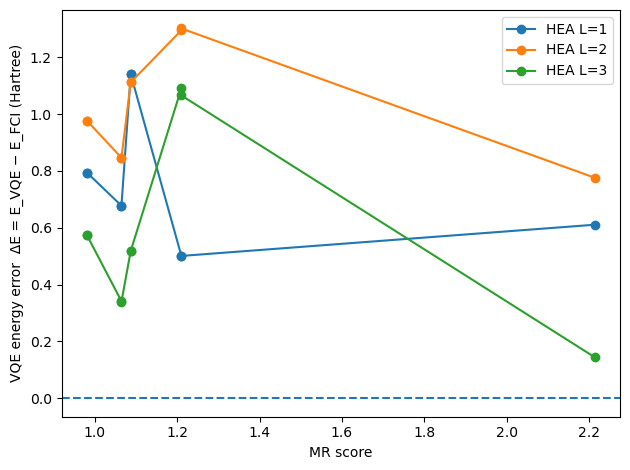

In [13]:
import matplotlib.pyplot as plt
import os
os.makedirs("../results/figures", exist_ok=True)

plt.figure()
for L in sorted(df_vqe["layers"].unique()):
    d = df_vqe[df_vqe["layers"]==L].sort_values("mr_score")
    plt.plot(d["mr_score"], d["dE"], marker="o", label=f"HEA L={L}")

plt.axhline(0.0, linestyle="--")
plt.xlabel("MR score")
plt.ylabel("VQE energy error  ΔE = E_VQE − E_FCI (Hartree)")
plt.legend()
plt.tight_layout()
plt.savefig("../results/figures/h4_vqe_error_vs_mrscore.png", dpi=200, bbox_inches="tight")
plt.show()


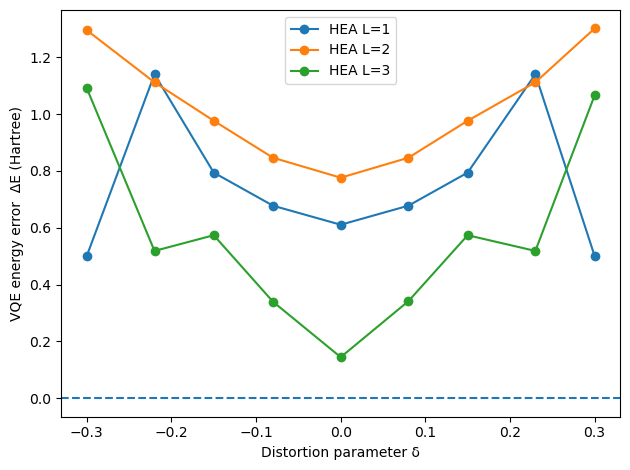

In [12]:
plt.figure()
for L in sorted(df_vqe["layers"].unique()):
    d = df_vqe[df_vqe["layers"]==L].sort_values("delta")
    plt.plot(d["delta"], d["dE"], marker="o", label=f"HEA L={L}")

plt.axhline(0.0, linestyle="--")
plt.xlabel("Distortion parameter δ")
plt.ylabel("VQE energy error  ΔE (Hartree)")
plt.legend()
plt.tight_layout()
plt.show()
